In [ ]:
!pip install WordCloud

In [ ]:
#!pip install --upgrade tensorflow==1.15

In [ ]:
#MEngimport semua library yg dibutuhkan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

In [ ]:
data = pd.read_csv('joy&fear_tweets.csv', sep=';')
data

,Data,Label
0,I feel like I am drowning. #depression #anxiet...,fear
1,#panic Panic attack from fear of starting new ...,fear
2,My bus was in a car crash... I'm still shaking...,fear
3,Just got back from seeing @GaryDelaney in Burs...,joy
4,It's the #FirstDayofFall and I'm so happy. Sip...,joy
5,Morning all! Of course it is sunny on this Mon...,joy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


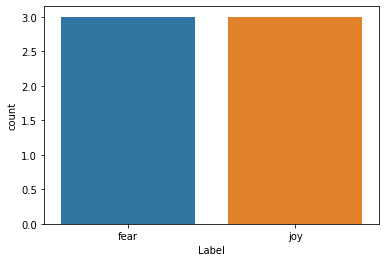

In [ ]:
#Menampilkan berapa banyak data yang memiliki label joy & fear
sns.countplot(data['Label'], label='count')

In [ ]:
# mencari panjang kata dari masing-masing tweet
data['length'] = data['Data'].apply(len)
data.head()

,Data,Label,length
0,I feel like I am drowning. #depression #anxiet...,fear,67
1,#panic Panic attack from fear of starting new ...,fear,56
2,My bus was in a car crash... I'm still shaking...,fear,136
3,Just got back from seeing @GaryDelaney in Burs...,joy,110
4,It's the #FirstDayofFall and I'm so happy. Sip...,joy,130


In [ ]:
# Menyimpan data yang punya label joy disimpan di variable joy
joy = data[data['Label']=='joy']
joy

,Data,Label,length
3,Just got back from seeing @GaryDelaney in Burs...,joy,110
4,It's the #FirstDayofFall and I'm so happy. Sip...,joy,130
5,Morning all! Of course it is sunny on this Mon...,joy,98


In [ ]:
# Menyimpan data yang punya label fear disimpan di variable fear
fear= data[data['Label']=='fear']
fear

,Data,Label,length
0,I feel like I am drowning. #depression #anxiet...,fear,67
1,#panic Panic attack from fear of starting new ...,fear,56
2,My bus was in a car crash... I'm still shaking...,fear,136


In [ ]:
# menampilkan 10 kalimat dari tweet
sentences = data['Data'].to_list()
sentences[:10]

['I feel like I am drowning. #depression #anxiety #failure #worthless',
 '#panic Panic attack from fear of starting new medication',
 "My bus was in a car crash... I'm still shaking a bit... This week was an absolute horror and this was the icing on the cake... #terrible",
 'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious',
 "It's the #FirstDayofFall and I'm so happy. Sipping my #PumpkinSpice flavoured coffee and #smiling! Happy Fall everyone! #amwriting",
 'Morning all! Of course it is sunny on this Monday morning to cheerfully welcome us back to work.:)']

In [ ]:
# menghilangkan spasi
single_sentence = ' '.join(sentences)
single_sentence[:500]

"I feel like I am drowning. #depression #anxiety #failure #worthless #panic Panic attack from fear of starting new medication My bus was in a car crash... I'm still shaking a bit... This week was an absolute horror and this was the icing on the cake... #terrible Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious It's the #FirstDayofFall and I'm so happy. Sipping my #PumpkinSpice flavoured coffee and #smiling! Happy Fall everyone! #amwrit"

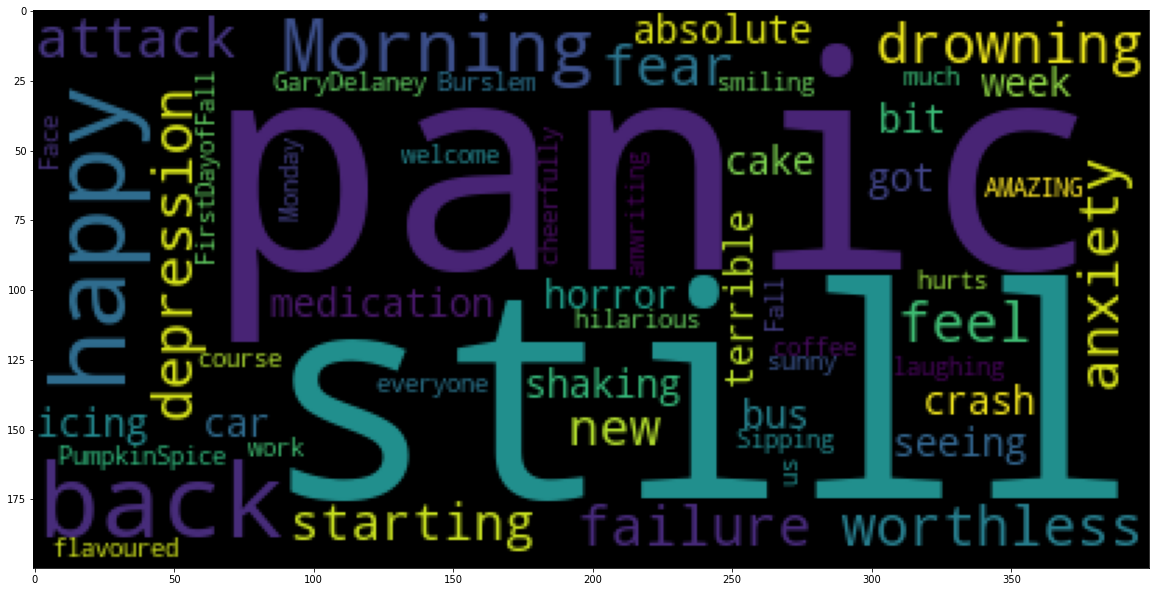

In [ ]:
# menampilkan plot untuk semua kata-kata tweet dari yang paling banyak sampai paling sedikit
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_sentence))

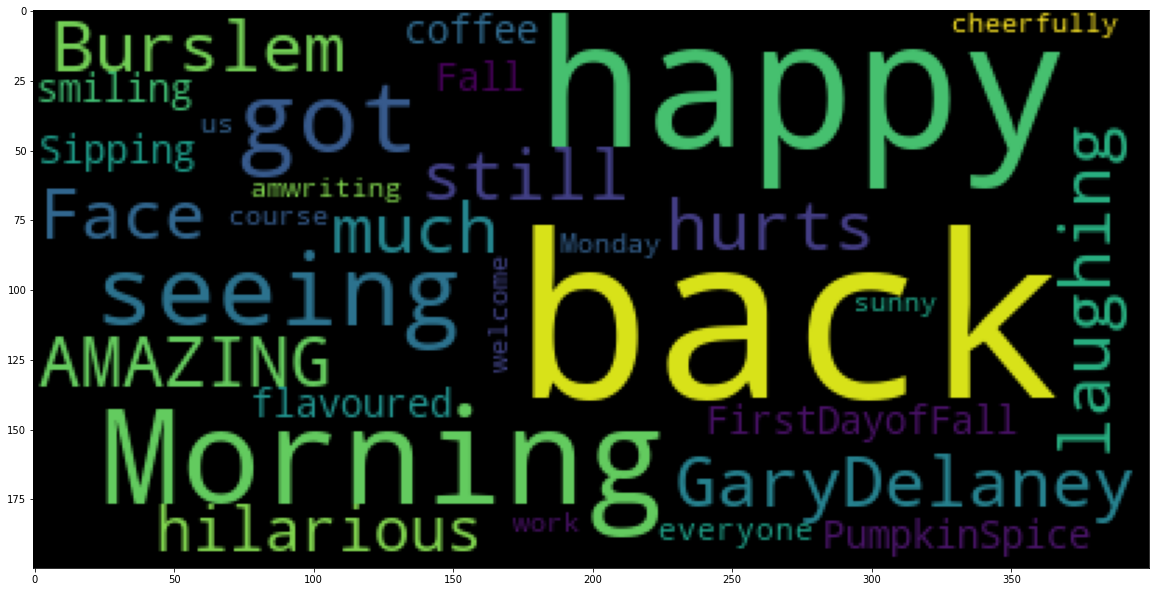

In [ ]:
# menampilkan plot untuk semua kata-kata tweet positive dari yang paling banyak sampai paling sedikit
joy_sentences = joy['Data'].to_list()
single_joy = ' '.join(joy_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_joy))

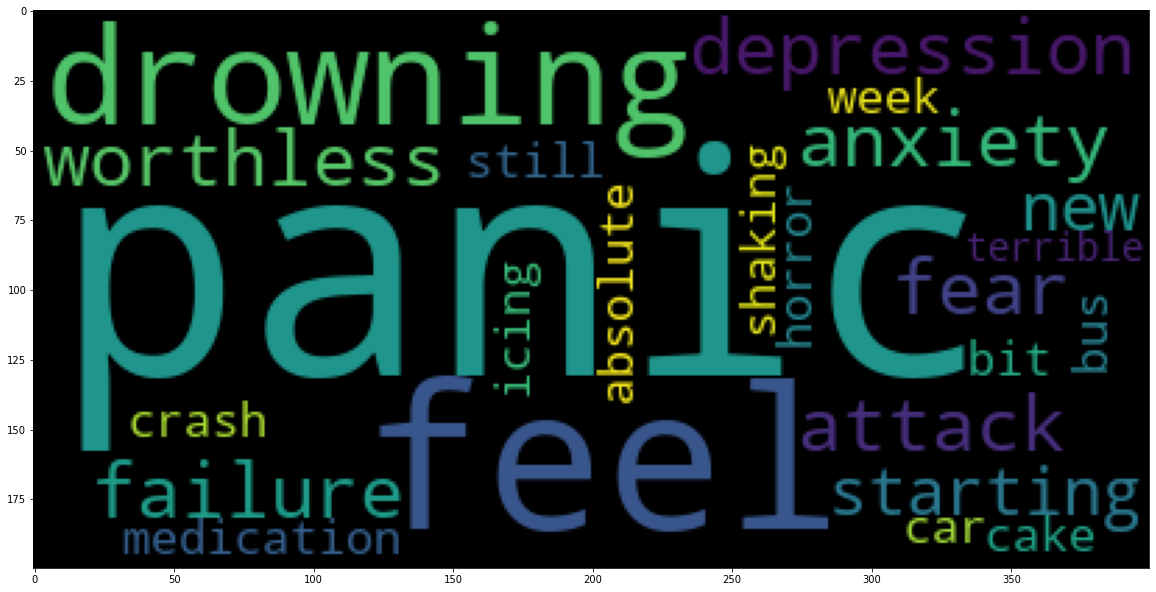

In [ ]:
# menampilkan plot untuk semua kata-kata tweet negative dari yang paling banyak sampai paling sedikit
fear_sentences = fear['Data'].to_list()
single_fear = ' '.join(fear_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_fear))

In [ ]:
# mendownload stopwords untuk data cleaning
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# melakukan import stopwords dalam bahasa inggris
from nltk.corpus import stopwords

In [ ]:
# membuat function data cleaning
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [ ]:
# memanggil function data cleaning
data_clean = data['Data'].apply(message_cleaning)
data_clean

0    [feel, like, drowning, depression, anxiety, fa...
1    [panic, Panic, attack, fear, starting, new, me...
2    [bus, car, crash, Im, still, shaking, bit, wee...
3    [got, back, seeing, GaryDelaney, Burslem, AMAZ...
4    [FirstDayofFall, Im, happy, Sipping, PumpkinSp...
5    [Morning, course, sunny, Monday, morning, chee...
Name: Data, dtype: object

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(data_clean, min_count=1, seed=0)

In [ ]:
vocabulary = word2vec.wv.vocab
vocabulary

{'AMAZING': <gensim.models.keyedvectors.Vocab at 0x7fd239836950>,
 'Burslem': <gensim.models.keyedvectors.Vocab at 0x7fd239836910>,
 'Face': <gensim.models.keyedvectors.Vocab at 0x7fd239836990>,
 'Fall': <gensim.models.keyedvectors.Vocab at 0x7fd239836cd0>,
 'FirstDayofFall': <gensim.models.keyedvectors.Vocab at 0x7fd239836ad0>,
 'GaryDelaney': <gensim.models.keyedvectors.Vocab at 0x7fd2398368d0>,
 'Happy': <gensim.models.keyedvectors.Vocab at 0x7fd239836c90>,
 'Im': <gensim.models.keyedvectors.Vocab at 0x7fd239836590>,
 'Monday': <gensim.models.keyedvectors.Vocab at 0x7fd239836e50>,
 'Morning': <gensim.models.keyedvectors.Vocab at 0x7fd239836d90>,
 'Panic': <gensim.models.keyedvectors.Vocab at 0x7fd23a97f050>,
 'PumpkinSpice': <gensim.models.keyedvectors.Vocab at 0x7fd239836b90>,
 'Sipping': <gensim.models.keyedvectors.Vocab at 0x7fd239836b50>,
 'absolute': <gensim.models.keyedvectors.Vocab at 0x7fd2398366d0>,
 'amwriting': <gensim.models.keyedvectors.Vocab at 0x7fd239836d50>,
 'anxie

In [ ]:
sim_words = word2vec.wv.most_similar('happy')
sim_words

[('cake', 0.1935175061225891),
 ('got', 0.1896454095840454),
 ('Burslem', 0.17394493520259857),
 ('amwriting', 0.1665734499692917),
 ('much', 0.13046543300151825),
 ('us', 0.11493092775344849),
 ('worthless', 0.11162732541561127),
 ('Face', 0.1073351800441742),
 ('car', 0.09751662611961365),
 ('Monday', 0.09432794898748398)]

In [ ]:
sim_words = word2vec.wv.most_similar('panic')
sim_words

[('like', 0.2664701044559479),
 ('course', 0.22399014234542847),
 ('sunny', 0.19492891430854797),
 ('us', 0.15403203666210175),
 ('GaryDelaney', 0.1482417732477188),
 ('hilarious', 0.13961809873580933),
 ('FirstDayofFall', 0.1283087432384491),
 ('back', 0.12160315364599228),
 ('Burslem', 0.11617030203342438),
 ('bit', 0.10531849414110184)]

In [ ]:
# menghitung vectorization
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
data_countvectorizer = vectorizer.fit_transform(data['Data']).toarray()
data_countvectorizer

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     

In [ ]:
vectorizer.get_feature_names()[:10]

['AMAZING',
 'Burslem',
 'Face',
 'Fall',
 'FirstDayofFall',
 'GaryDelaney',
 'Happy',
 'Im',
 'Monday',
 'Morning']

In [ ]:
x = data_countvectorizer
y = data['Label']

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
x.shape

(6, 58)

In [ ]:
x

array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.70710678, -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
         2.23606798, -0.4472136 , -0.70710678, -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ,  2.23606798,  2.23606798, -0.4472136 ,  2.23606798,
        -0.4472136 ,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
         2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.70710678, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 ,  2.23606798],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 , -0.4472136 , -0.70710678, -0.4472136 , -0.4472136 ,
   

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
encoder = OneHotEncoder().fit(y_train)
y_train = encoder.transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()

In [ ]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

In [ ]:
ALPHA = 0.1
EPOCH = 10
n_features = x_train.shape[1]
n_classes = y_train.shape[1]

In [ ]:
input_tensor = tf.placeholder(tf.float32)
label_tensor = tf.placeholder(tf.float32)

In [ ]:
neurons = [8,8, n_classes]
n_layers = len(neurons)

In [ ]:
parameters = {}
for i in range(n_layers):
  parameters[f'W{i+1}'] = tf.Variable(tf.random.normal([n_features if (i==0) else neurons[i-1], neurons[i]]),tf.float32)

  parameters[f'B{i+1}'] = tf.Variable(tf.random.normal([1, neurons[i]]),tf.float32)

In [ ]:
def forward():
  a = input_tensor
  for i in range(n_layers):
    w = parameters[f'W{i+1}']
    b = parameters[f'B{i+1}']

    z = tf.matmul(a, w) + b
    if i == n_layers - 1:
      a = tf.nn.softmax(z)
    else:
      a = tf.nn.tanh(z)
  return a

In [ ]:
y_predict = forward()

In [ ]:
with tf.Session() as sess:
  logits_tensor = forward()
  loss_tensor = tf.reduce_mean(0.5 * (label_tensor - logits_tensor) ** 2)
  true_preds_tensor = tf.equal(tf.argmax(logits_tensor, axis=1), tf.argmax(label_tensor, axis=1))
  acc_tensor = tf.reduce_mean(tf.cast(true_preds_tensor, tf.float32))
  optimizer = tf.train.GradientDescentOptimizer(ALPHA).minimize(loss_tensor)
  sess.run(tf.global_variables_initializer())

  for i in range(EPOCH):
    sess.run(optimizer, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    loss = sess.run(loss_tensor, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    acc = sess.run(acc_tensor, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    print(f'Epoch {i+1} - Loss {loss:.4f} - Accuracy {(acc*100):.2f} %')

  y_preds = sess.run(y_predict, feed_dict={
      input_tensor: x_train,
      label_tensor: y_train
  })
  y_true = np.argmax(y_train,1)
  y_preds = np.argmax(y_preds,1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1 - Loss 0.1053 - Accuracy 80.00 %
Epoch 2 - Loss 0.1047 - Accuracy 80.00 %
Epoch 3 - Loss 0.1042 - Accuracy 80.00 %
Epoch 4 - Loss 0.1038 - Accuracy 80.00 %
Epoch 5 - Loss 0.1034 - Accuracy 80.00 %
Epoch 6 - Loss 0.1031 - Accuracy 80.00 %
Epoch 7 - Loss 0.1029 - Accuracy 80.00 %
Epoch 8 - Loss 0.1026 - Accuracy 80.00 %
Epoch 9 - Loss 0.1025 - Accuracy 80.00 %
Epoch 10 - Loss 0.1023 - Accuracy 80.00 %


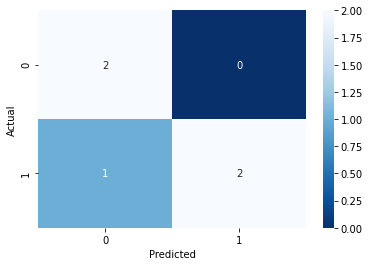

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = pd.crosstab(y_true, y_preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap = 'Blues_r')

In [ ]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

